In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#Import required libraries
import os
import time
from pathlib import Path

import pandas as pd
import numpy as np
import PIL
from tqdm import tqdm
from functools import partial

from fastai.vision import *
from fastai.metrics import accuracy

import random

from IPython.display import Image
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import torch
os.getcwd()

'/content'

In [ ]:
#Import data
train_df = pd.read_csv('/content/drive/My Drive/EAST/iMaterialist_Train_2000.csv')
valid_df = pd.read_csv('/content/drive/My Drive/EAST/valid500.csv')

In [ ]:
train_df.head()

file_path                                             labels
0  /content/drive/My Drive/iMaterialist2000/538eb...  Dress Shirts;Green;Pink;Female;Collared;Long S...
1  /content/drive/My Drive/iMaterialist2000/55362...                         Shorts;Female;Denim;Ripped
2  /content/drive/My Drive/iMaterialist2000/59538...  Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;F...
3  /content/drive/My Drive/iMaterialist2000/59ab9...  Costumes & Cosplay;Neutral;Round Neck;Short Sl...
4  /content/drive/My Drive/iMaterialist2000/55519...  T-Shirts;White;Female;Cotton;Round Neck;Short ...

In [ ]:
valid_df.head()

file_path                                             labels
0  /content/drive/My Drive/valid500_images/54a392...  Dance Wear;Purple;White;Black;Female;U-Necks;S...
1  /content/drive/My Drive/valid500_images/540ea6...  Bikinis;Female;Strapless;Multi Color;Sweethear...
2  /content/drive/My Drive/valid500_images/5800ab...  Sweatpants;Black;Gray;Short Sleeves;Neutral;Co...
3  /content/drive/My Drive/valid500_images/5a0fcb...         Swimsuits;Female;Peach;White;Nylon;Stripes
4  /content/drive/My Drive/valid500_images/5921db...  Polos;Male;Collared;Short Sleeves;Gray;Black;C...

In [ ]:
train_df['fpath'] = train_df['file_path'].str.replace('/content/drive/My Drive/', '')

In [ ]:
train_df

file_path  ...                                              fpath
0     /content/drive/My Drive/iMaterialist2000/538eb...  ...  iMaterialist2000/538eb83d7360462e2a799417-larg...
1     /content/drive/My Drive/iMaterialist2000/55362...  ...  iMaterialist2000/553620b8d57a010c1d38645c-larg...
2     /content/drive/My Drive/iMaterialist2000/59538...  ...  iMaterialist2000/595388b61bb25874af2789a2-larg...
3     /content/drive/My Drive/iMaterialist2000/59ab9...  ...  iMaterialist2000/59ab99620b18267c7f60d726-larg...
4     /content/drive/My Drive/iMaterialist2000/55519...  ...  iMaterialist2000/55519d27f486251be84cac64-larg...
...                                                 ...  ...                                                ...
1995  /content/drive/My Drive/iMaterialist2000/5695c...  ...  iMaterialist2000/5695c1a9e733fe4d5e4e819a-larg...
1996  /content/drive/My Drive/iMaterialist2000/53b1d...  ...  iMaterialist2000/53b1d0e800cb86292c10cb60-larg...
1997  /content/drive/My Drive/iMaterialist2000/53e20...  ...  iMaterialist2000/53e20542d911396ca1dcdc04-larg...
1998  /content/drive/My Drive/iMaterialist2000/547fd...  ...  iMaterialist2000/547fd6b786113d0f2c517144-larg...
1999  /content/drive/My Drive/iMaterialist2000/555e3...  ...  iMaterialist2000/555e3fae3179350e8aaf9888-larg...

[2000 rows x 3 columns]

In [ ]:
train_df = train_df.drop(['file_path'],axis =1)

In [ ]:
train_df = train_df[['fpath', 'labels']]

In [ ]:
#drop null values 
train_df = train_df.dropna()

In [ ]:
train_df.shape

(1996, 2)

In [ ]:
train_df

fpath                                             labels
0     iMaterialist2000/538eb83d7360462e2a799417-larg...  Dress Shirts;Green;Pink;Female;Collared;Long S...
1     iMaterialist2000/553620b8d57a010c1d38645c-larg...                         Shorts;Female;Denim;Ripped
2     iMaterialist2000/595388b61bb25874af2789a2-larg...  Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;F...
3     iMaterialist2000/59ab99620b18267c7f60d726-larg...  Costumes & Cosplay;Neutral;Round Neck;Short Sl...
4     iMaterialist2000/55519d27f486251be84cac64-larg...  T-Shirts;White;Female;Cotton;Round Neck;Short ...
...                                                 ...                                                ...
1995  iMaterialist2000/5695c1a9e733fe4d5e4e819a-larg...            Cargo Pants;Multi Color;Male;Camouflage
1996  iMaterialist2000/53b1d0e800cb86292c10cb60-larg...  Vests;Female;V-Necks;Paisley;Sleeveless;Vintag...
1997  iMaterialist2000/53e20542d911396ca1dcdc04-larg...  Clubbing Dresses;Female;V-Necks;Ruched;Sleevel...
1998  iMaterialist2000/547fd6b786113d0f2c517144-larg...  Bubble Coats;Male;Turtlenecks;Quilted;Long Sle...
1999  iMaterialist2000/555e3fae3179350e8aaf9888-larg...              Cardigans;Female;V-Necks;Long Sleeved

[1996 rows x 2 columns]

In [ ]:
valid_df['fpath'] = valid_df['file_path'].str.replace('/content/drive/My Drive/', '')

In [ ]:
valid_df = valid_df.drop(['file_path'], axis=1)

In [ ]:
valid_df = valid_df[['fpath', 'labels']]

In [ ]:
valid_df = valid_df.dropna()

In [ ]:
valid_df

fpath                                             labels
0    valid500_images/54a392283b64454816a70f1c-large...  Dance Wear;Purple;White;Black;Female;U-Necks;S...
1    valid500_images/540ea6081d2d431f274b5932-large...  Bikinis;Female;Strapless;Multi Color;Sweethear...
2    valid500_images/5800ab5b2fbe17229fed2c86-large...  Sweatpants;Black;Gray;Short Sleeves;Neutral;Co...
3    valid500_images/5a0fcb50591d3a2b57454eff-large...         Swimsuits;Female;Peach;White;Nylon;Stripes
4    valid500_images/5921db0a1772f241e67031ef-large...  Polos;Male;Collared;Short Sleeves;Gray;Black;C...
..                                                 ...                                                ...
495  valid500_images/544876ff9719cd33e71049d6-large...  Costumes & Cosplay;Female;Sleeveless;Red;White...
496  valid500_images/543fff812788b27abb8cce45-large...  Pullover Sweaters;Male;Round Neck;Long Sleeved...
497  valid500_images/540f17787a9eb460a80d0f1f-large...  Athletic Sets;Female;Round Neck;Long Sleeved;G...
498  valid500_images/557eba95072c8419f2131fe3-large...  Suits & Blazers;Male;Long Sleeved;Black;White;...
499  valid500_images/5533916d1a8a2217256ed419-large...            Skirts;Female;Black;Lace;Bodycon;Summer

[500 rows x 2 columns]

In [ ]:
#save the new csvs
train_df.to_csv('/content/model_trainEAST.csv', index = False)
valid_df.to_csv('/content/model_validEast.csv', index = False)

#Load on restart
#train_df = pd.read_csv('/content/model_trainEAST.csv')
#valid_df = pd.read_csv('/content/model_validEast.csv')

In [ ]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
??get_transforms

In [ ]:
??ImageList.from_csv

In [ ]:
# Creating the imagelists.
train_list = ImageList.from_df(train_df[['fpath', 'labels']], path=Path('/content/drive/My Drive/EAST/'))
valid_list = ImageList.from_df(valid_df[['fpath', 'labels']], path=Path('/content/drive/My Drive/EAST/'))

In [ ]:
train_list

ImageList (1996 items)
Image (3, 405, 410),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600)
Path: /content/drive/My Drive/EAST

In [ ]:
valid_list

ImageList (500 items)
Image (3, 600, 555),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600),Image (3, 600, 600)
Path: /content/drive/My Drive/EAST

In [ ]:
#Dataloader(dataset, bs, shuffle, sampler, num_workers=, etc)
#Combines the dataset and sampler and provides single/ multi process iterators to iterate over the dataset
#dataset - from where to load the dataset
#Dataloader doesn't have a provision for combining validation data

#So DataBunch - Binds together train dataloader and validation dataloader and optionally test dataloader

In [ ]:
sd = train_list.split_by_list(train = train_list, valid = valid_list)       #To tell the model where the images come from 

In [ ]:
#DATA BLOCK API -- FASTAI
# Calling seed() to ensure reproducibilty.
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')
data = (sd.label_from_df(label_delim=';')                        #telling the model where the labels come from
          .transform(tfms=tfms, size = 224)                      #performing transforms on dataset
          .databunch(bs=32)                                      # create the dataloader and databunch in 1 go
          .normalize(imagenet_stats))                            #normalize with imagenet stats

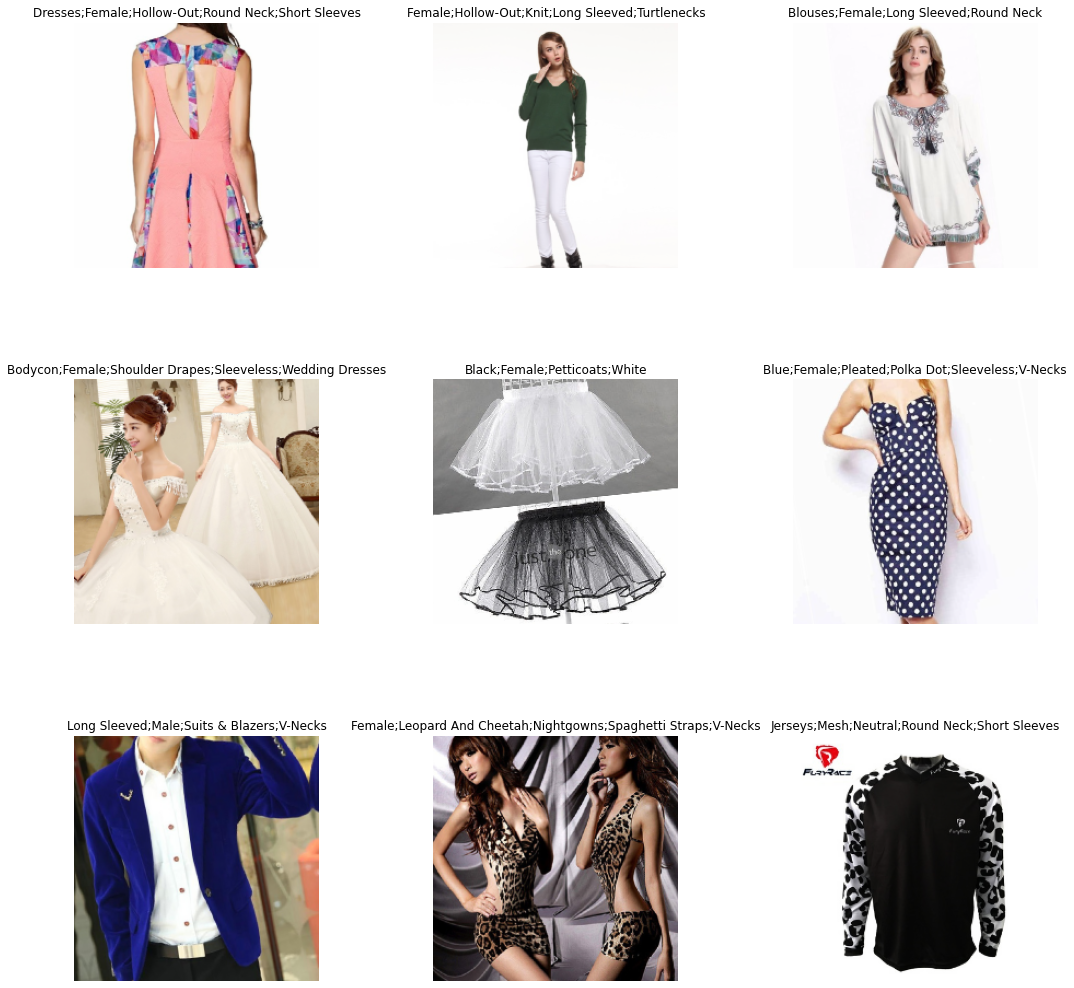

In [ ]:
#display samples 
data.show_batch(rows=3, figsize=(15,15))

In [ ]:
#Labels: total number and names
#data.c --- a databunch has a special attribute called c which tells how many outputs does the model need to create; so for this classifier, 
                                                                                 #we want one probabilty for each of the 200 classes
data.c, data.classes                   

(200,
 ['Asymmetric',
  'Athletic Pants',
  'Athletic Sets',
  'Athletic Shirts',
  'Athletic Shorts',
  'Backless Dresses',
  'Baggy Jeans',
  'Bandage',
  'Bandeaus',
  'Batwing Tops',
  'Beaded',
  'Beige',
  'Bikinis',
  'Black',
  'Blouses',
  'Blue',
  'Bodycon',
  'Bodysuits',
  'Boots',
  'Brown',
  'Bubble Coats',
  'Business Shoes',
  'Camouflage',
  'Canvas',
  'Capes & Capelets',
  'Capri Pants',
  'Cardigans',
  'Cargo Pants',
  'Cargo Shorts',
  'Cashmere',
  'Casual Dresses',
  'Casual Pants',
  'Casual Shirts',
  'Casual Shoes',
  'Casual Shorts',
  'Checkered',
  'Chevron',
  'Chiffon',
  'Clear',
  'Clubbing Dresses',
  'Cocktail Dresses',
  'Collared',
  'Corsets',
  'Costumes & Cosplay',
  'Cotton',
  'Criss Cross',
  'Crochet',
  'Crop Tops',
  'Custom Made Clothing',
  'Dance Wear',
  'Denim',
  'Drawstring Pants',
  'Dress Shirts',
  'Dresses',
  'Embroidered',
  'Fashion Sets',
  'Faux Fur',
  'Female',
  'Flannel',
  'Fleece',
  'Floral',
  'Formal Dresses',
  

In [ ]:
#Exploring data after transforms and bunching
data.train_ds[1]    # item in the training data with index 1 and it corresponding multi labels

(Image (3, 224, 224), MultiCategory [0. 0. 0. 0. ... 0. 0. 0. 0.])

In [ ]:
#Exploring the number of classes in training set
data.train_ds.c, data.train_ds.classes

In [ ]:
#Exploring the number of classes in validation set
data.valid_ds.c, data.valid_ds.classes

For multilabel classifier, you dont just want to predict one label for one image but multiple lables for a single image; now in order to achieve that you set a threshold which signifies that for any attribute to have a value above that threshold, the model is going to assume that that image has that feature/attribute. SO instead of 'accuracy' that we use in case of single label classification; here we use 'accuracy_thresh' instead of 'accuracy'.

For single label prediction, you just pick the class with maximum activation, but here each activation can be 0 or 1. accuracy_thresh selects the ones that are above a certain threshold(default = 0.5) and compares them to ground truth.

In simple words- 'accuracy_thresh' compares each probability to a threshold and if the value exceeds the threshold, assigns that class a value of 1

In [ ]:
data.valid_ds[0]

(Image (3, 224, 224), MultiCategory [0. 0. 0. 0. ... 0. 0. 0. 0.])

In [ ]:
#Fast AI Learner
arch = models.resnet34

acc_02 = partial(accuracy_thresh, thresh=0.2)                 # partial lets you use the same function with a little modification
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, pretrained=True, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
accuracy_thresh??

In [ ]:
#Use LR finder to pick a good learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


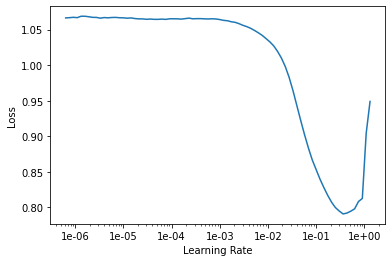

In [ ]:
learn.recorder.plot()

In [ ]:
lr= 0.05

In [ ]:
learn.fit_one_cycle(5, slice(lr))

In [ ]:
#learn.save('/content/drive/My Drive/EAST/stage1-resnet34')
learn.load('/content/drive/My Drive/EAST/stage1-resnet34')

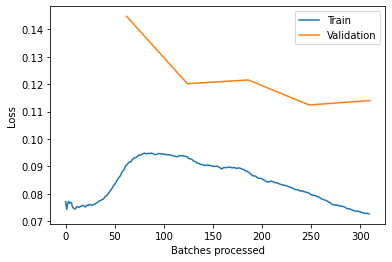

In [ ]:
learn.recorder.plot_losses()

And now fine tune the whole model

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


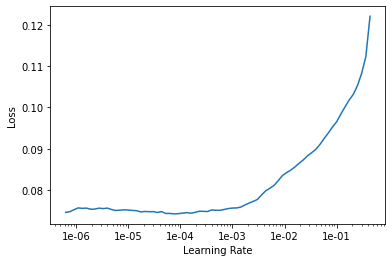

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/10))

In [ ]:
#learn.save('/content/drive/My Drive/EAST/stage2-resnet34')
learn.load('/content/drive/My Drive/EAST/stage2-resnet34')

In [42]:
data = (sd.label_from_df(label_delim=';')                        #telling the model where the labels come from
          .transform(tfms=tfms, size = 256)                      #performing transforms on dataset
          .databunch(bs=32)                                      # create the dataloader and databunch in 1 go
          .normalize(imagenet_stats))                            #normalize with imagenet stats

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [ ]:
learn.freeze()                                          #train only the last few layers

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


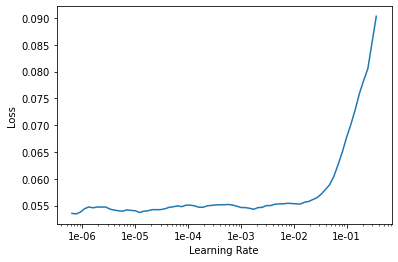

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 1e-02/2

In [ ]:
learn.fit_one_cycle(5, slice(lr))

In [43]:
#learn.save('/content/drive/My Drive/EAST/stage1-256-resnet34')
learn.load('/content/drive/My Drive/EAST/stage1-256-resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (1996 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Dress Shirts;Green;Pink;Female;Collared;Long Sleeved,Shorts;Female;Denim;Ripped,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;Female;Sleeveless;Pleated,Costumes & Cosplay;Neutral;Round Neck;Short Sleeves;Vintage Retro,T-Shirts;White;Female;Cotton;Round Neck;Short Sleeves;Printed
Path: /content/drive/My Drive/EAST;

Valid: LabelList (500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Dance Wear;Purple;White;Black;Female;U-Necks;Short Sleeves;Polyester;Stripes;Vintage Retro,Bikinis;Female;Strapless;Multi Color;Sweetheart Neckline;Spandex;Nylon;Floral;Bandeaus;Bandage;Printed,Sweatpants;Black;Gray;Short Sleeves;Neutral;Cotton;Rayon,Swimsuits;Female;Peach;White;Nylon;Stripes,Polos;Male;Collared;Short Sleeves

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, slice(1e-4, lr/5))

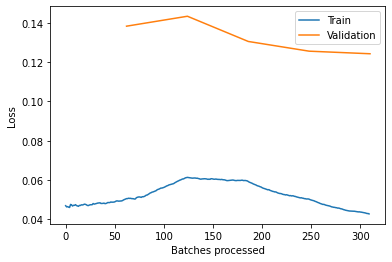

In [ ]:
learn.recorder.plot_losses()

In [45]:
#learn.save('/content/drive/My Drive/EAST/stage-2-256-resnet34')
learn.load('/content/drive/My Drive/EAST/stage-2-256-resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (1996 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Dress Shirts;Green;Pink;Female;Collared;Long Sleeved,Shorts;Female;Denim;Ripped,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;Female;Sleeveless;Pleated,Costumes & Cosplay;Neutral;Round Neck;Short Sleeves;Vintage Retro,T-Shirts;White;Female;Cotton;Round Neck;Short Sleeves;Printed
Path: /content/drive/My Drive/EAST;

Valid: LabelList (500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Dance Wear;Purple;White;Black;Female;U-Necks;Short Sleeves;Polyester;Stripes;Vintage Retro,Bikinis;Female;Strapless;Multi Color;Sweetheart Neckline;Spandex;Nylon;Floral;Bandeaus;Bandage;Printed,Sweatpants;Black;Gray;Short Sleeves;Neutral;Cotton;Rayon,Swimsuits;Female;Peach;White;Nylon;Stripes,Polos;Male;Collared;Short Sleeves

In [ ]:
preds, targs = learn.get_preds()

In [ ]:
preds[1]

In [ ]:
valid_list = ImageList.from_df(valid_df[['fpath', 'labels']], path=Path('/content/drive/My Drive/EAST/'))

In [ ]:
#To view predictions ----- IGNORE THIS CELL
'''sort_sample_mapping = {}
for count, i in enumerate(learn.data.valid_dl.sampler):
    sort_sample_mapping[i] = count

tmp_pred = learn.get_preds()

y_predicted_unsorted = []
y_gt_unsorted = []
for idx in range(0, len(tmp_pred[0])):
    pred = [x.tolist() for x in list(tmp_pred[0][idx])]
    max_val = max(pred)
    y_true_i = tmp_pred[1].tolist()[idx]
    y_pred_i = pred.index(max_val)
    y_predicted_unsorted.append(y_pred_i)
    y_gt_unsorted.append(y_true_i)

y_predicted_sorted = []
y_gt_sorted = []

for i in range(0, len(y_predicted_unsorted)):
    y_predicted_sorted.append(y_predicted_unsorted[sort_sample_mapping[i]])
    y_gt_sorted.append(y_gt_unsorted[sort_sample_mapping[i]])'''

In [ ]:
y_gt_sorted

In [ ]:
len(y_predicted_sorted)

500

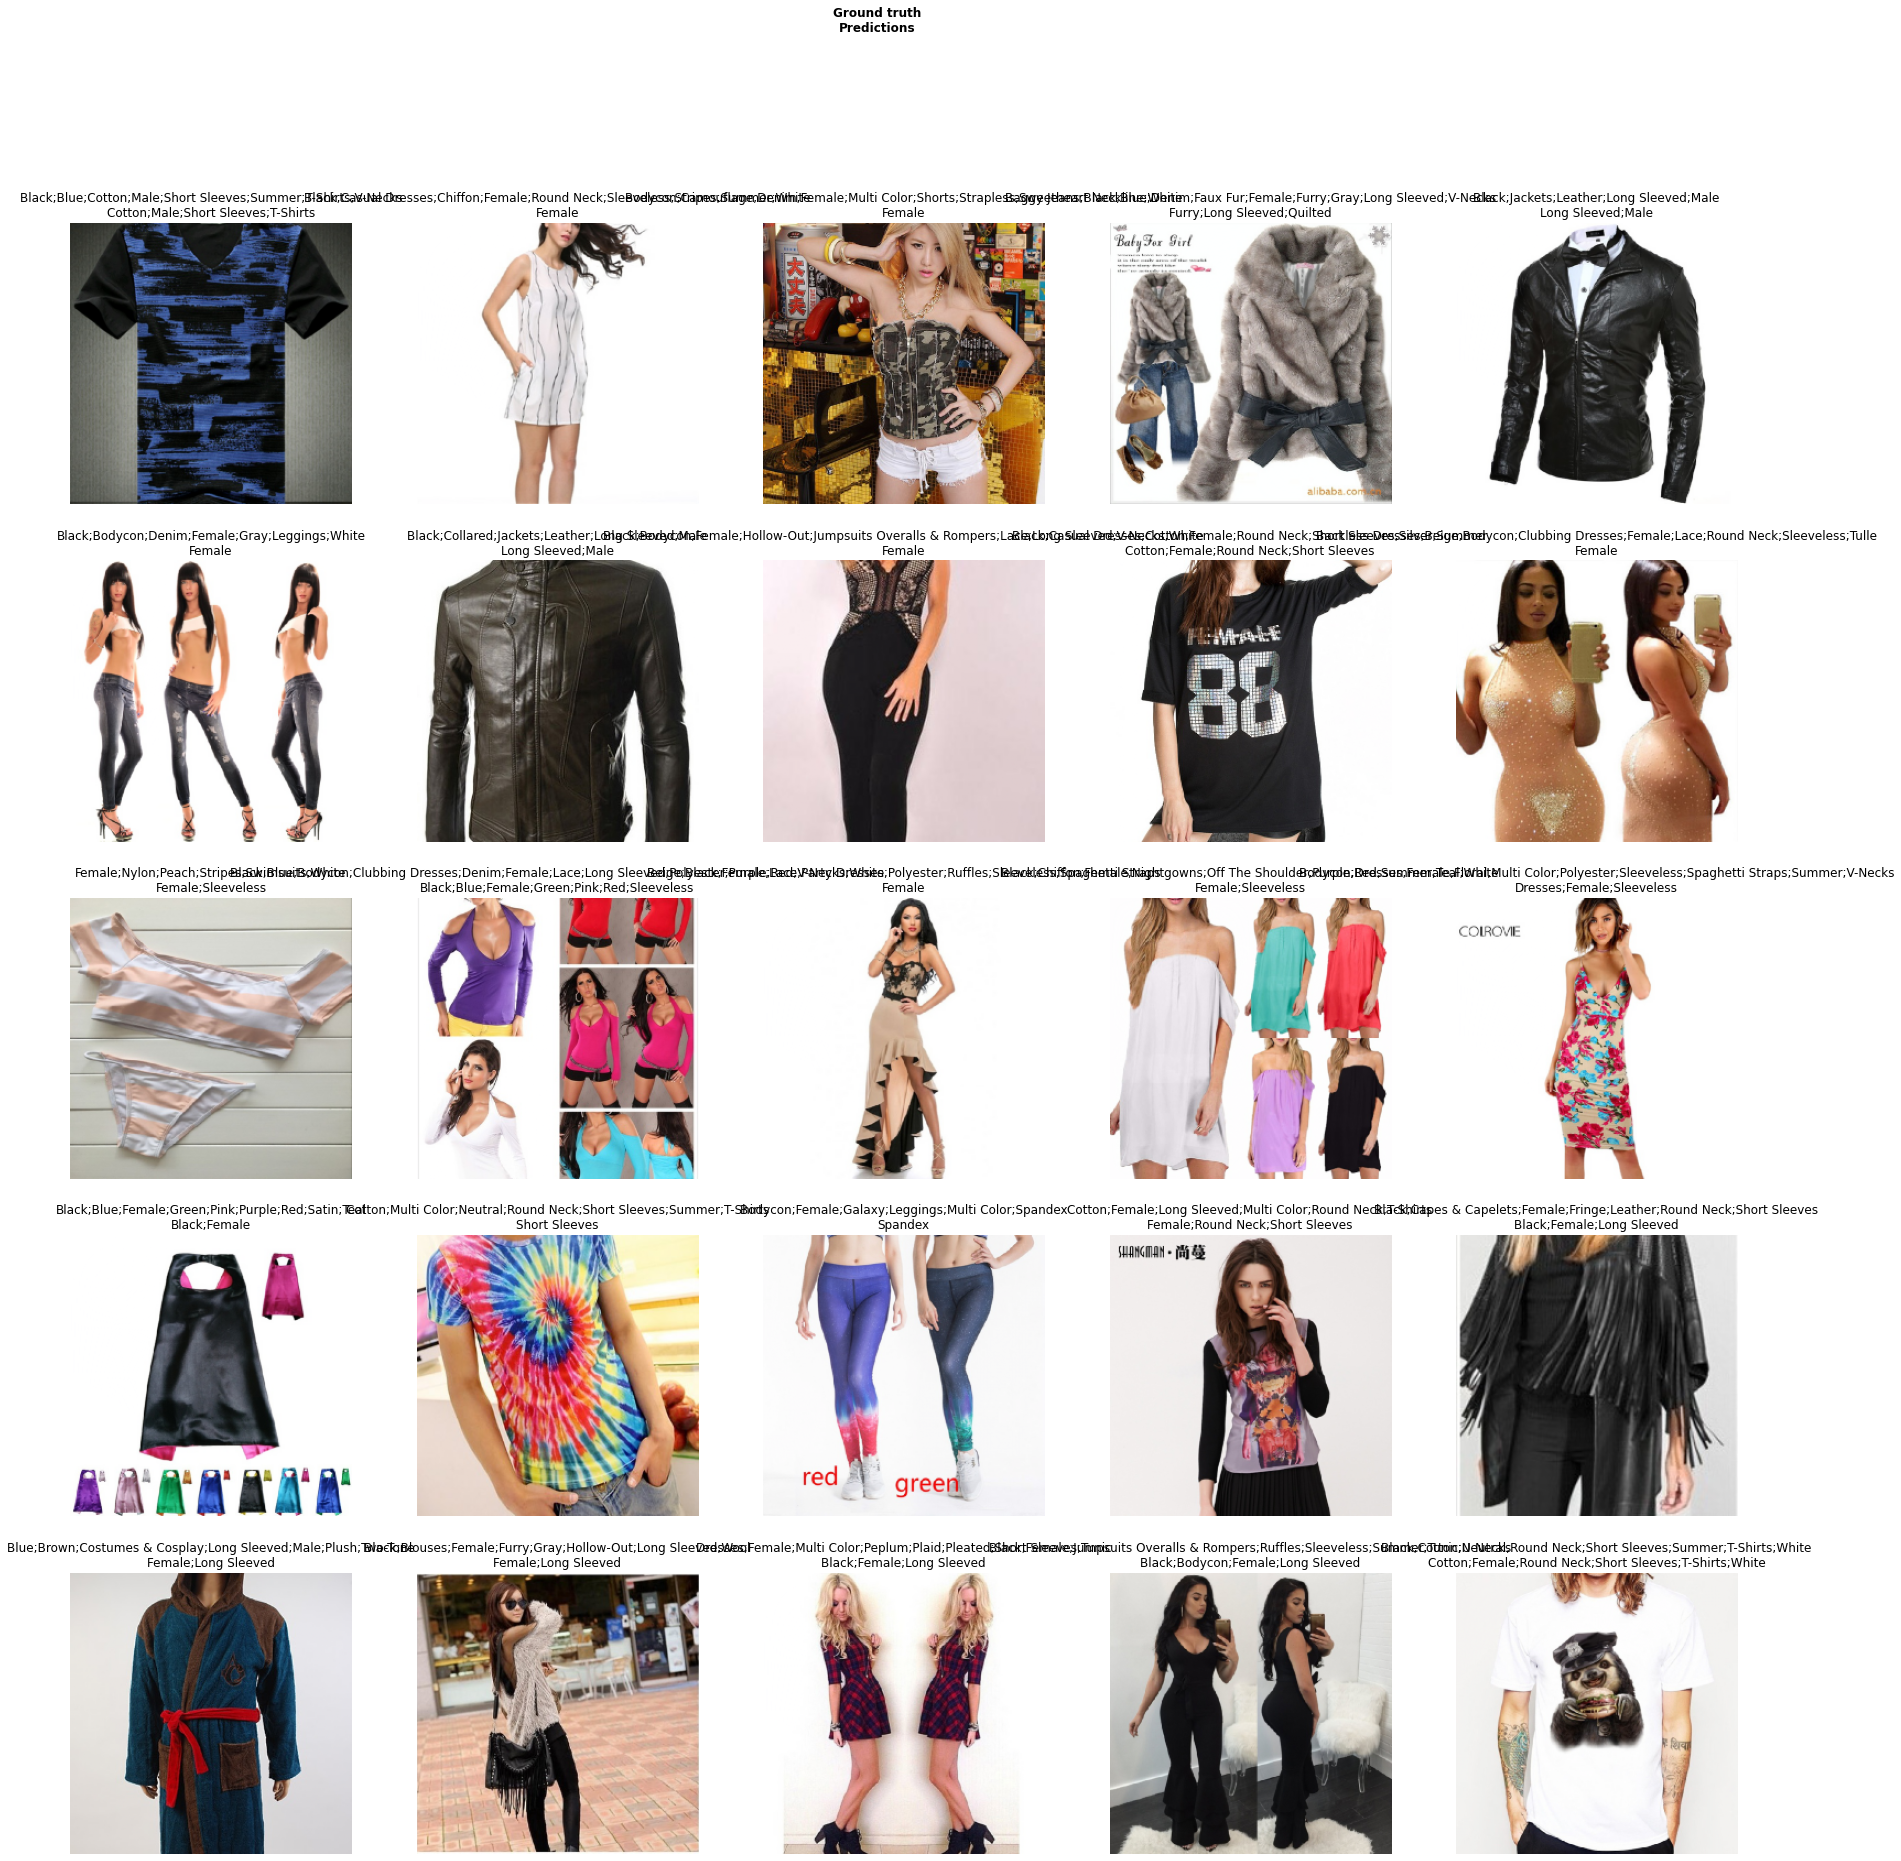

In [46]:
#Display predictions on validation set
data.valid_dl = data.valid_dl.new(shuffle=True)                                    #To view different validation batches each time 
learn.show_results(dl = data.valid_dl ,figsize=(30,30))                            